In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams.update({
    'font.size': 30,
    'axes.labelsize': 30,
    'xtick.labelsize': 30,
    'ytick.labelsize': 30,
    'legend.fontsize': 30,
    'lines.linewidth': 2.5,
    'lines.markersize': 7,
})


In [8]:
import numpy as np
import matplotlib.ticker as ticker

def set_dynamic_ssim_axis(ax, df, step=0.03, margin_ratio=0.10):
    # Min/max globais
    min_ssim = min(
        df['ssim_dual'].min(),
        df['ssim_nlm'].min(),
        df['ssim_gnlm'].min(),
        df['ssim_bm3d'].min()
    )
    max_ssim = max(
        df['ssim_dual'].max(),
        df['ssim_nlm'].max(),
        df['ssim_gnlm'].max(),
        df['ssim_bm3d'].max()
    )

    # Margem proporcional ao range
    data_range = max_ssim - min_ssim
    margin = margin_ratio * data_range if data_range > 0 else 0.03

    ymin = max(0.0, min_ssim - margin)
    ymax = min(1.20, max_ssim + margin)

    ax.set_ylim(ymin, ymax)

    # Ticks bem distribuídos
    ticks = np.arange(
        np.floor(ymin / step) * step,
        np.ceil(ymax / step) * step + 1e-9,
        step
    )
    ax.set_yticks(ticks)
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

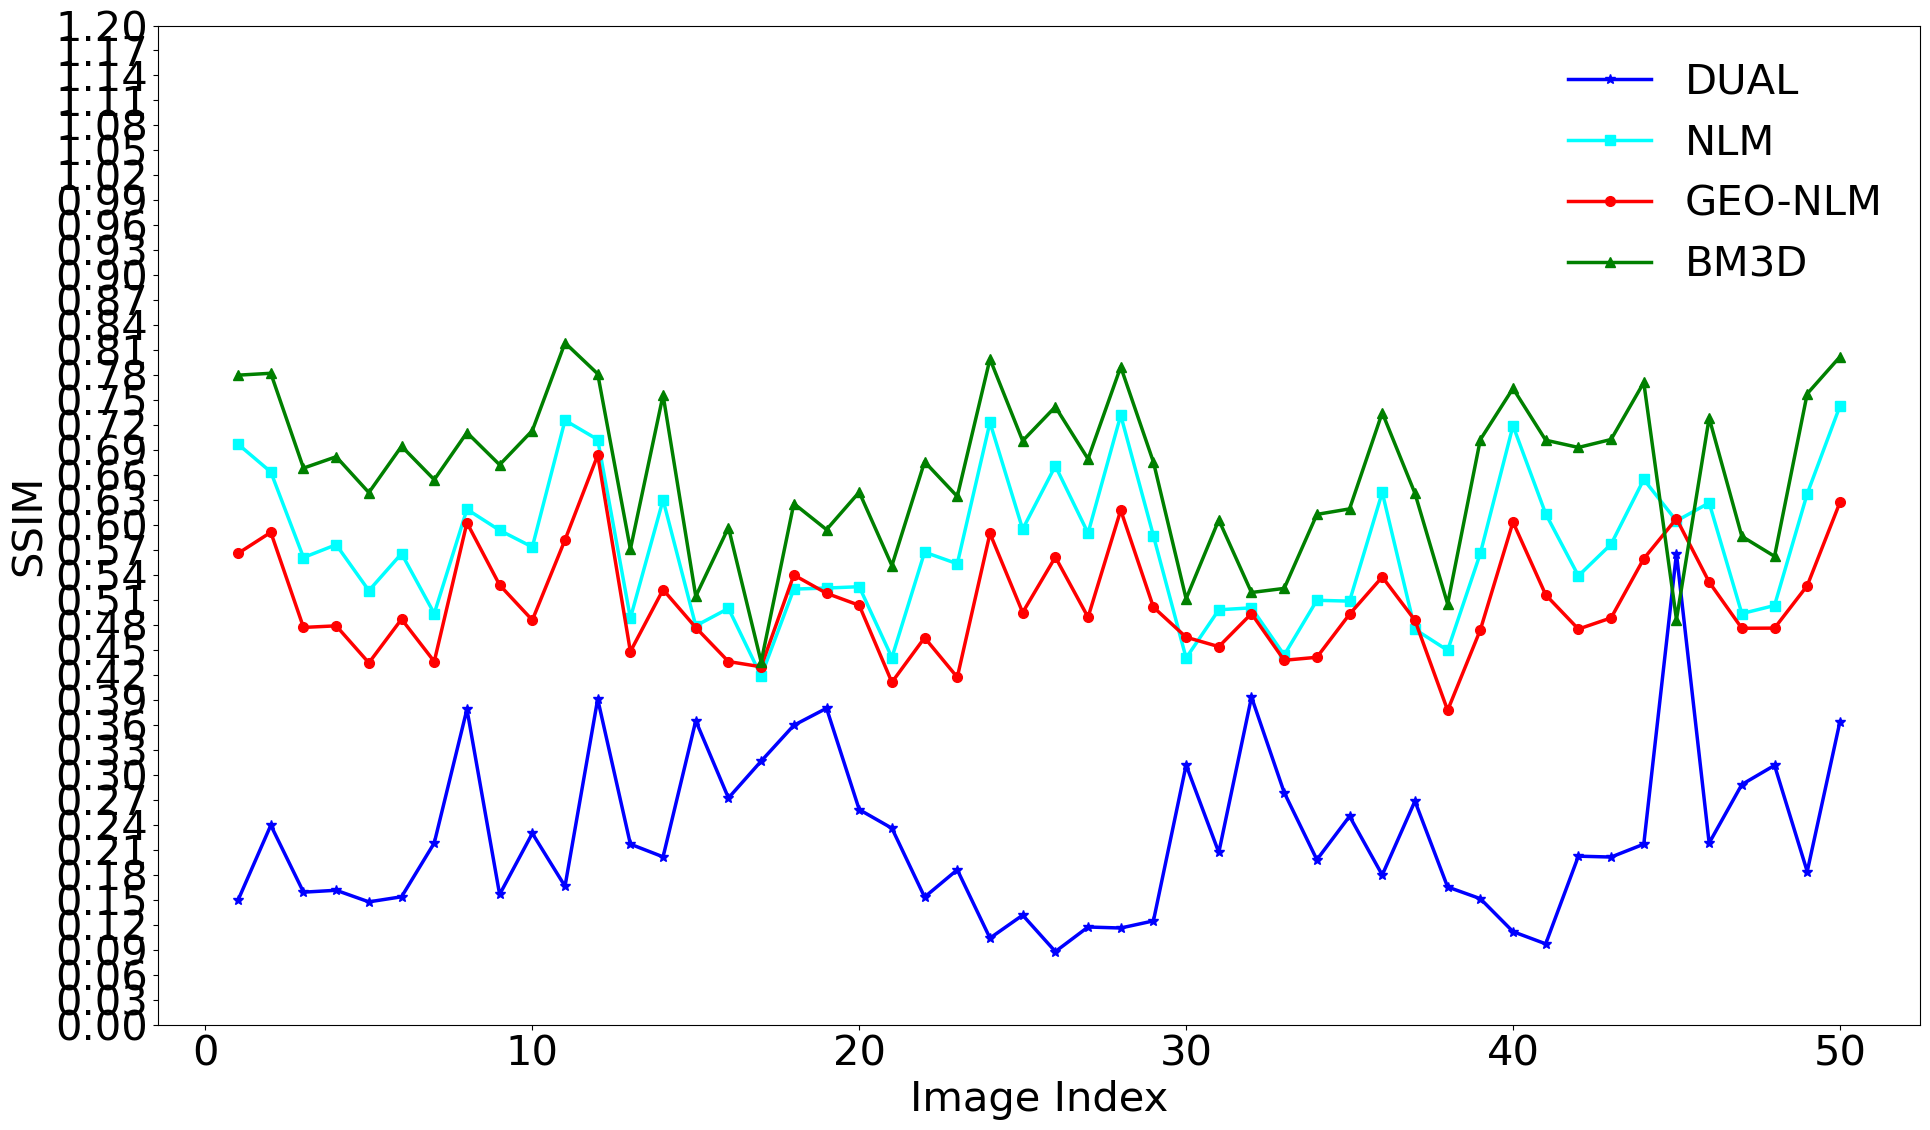

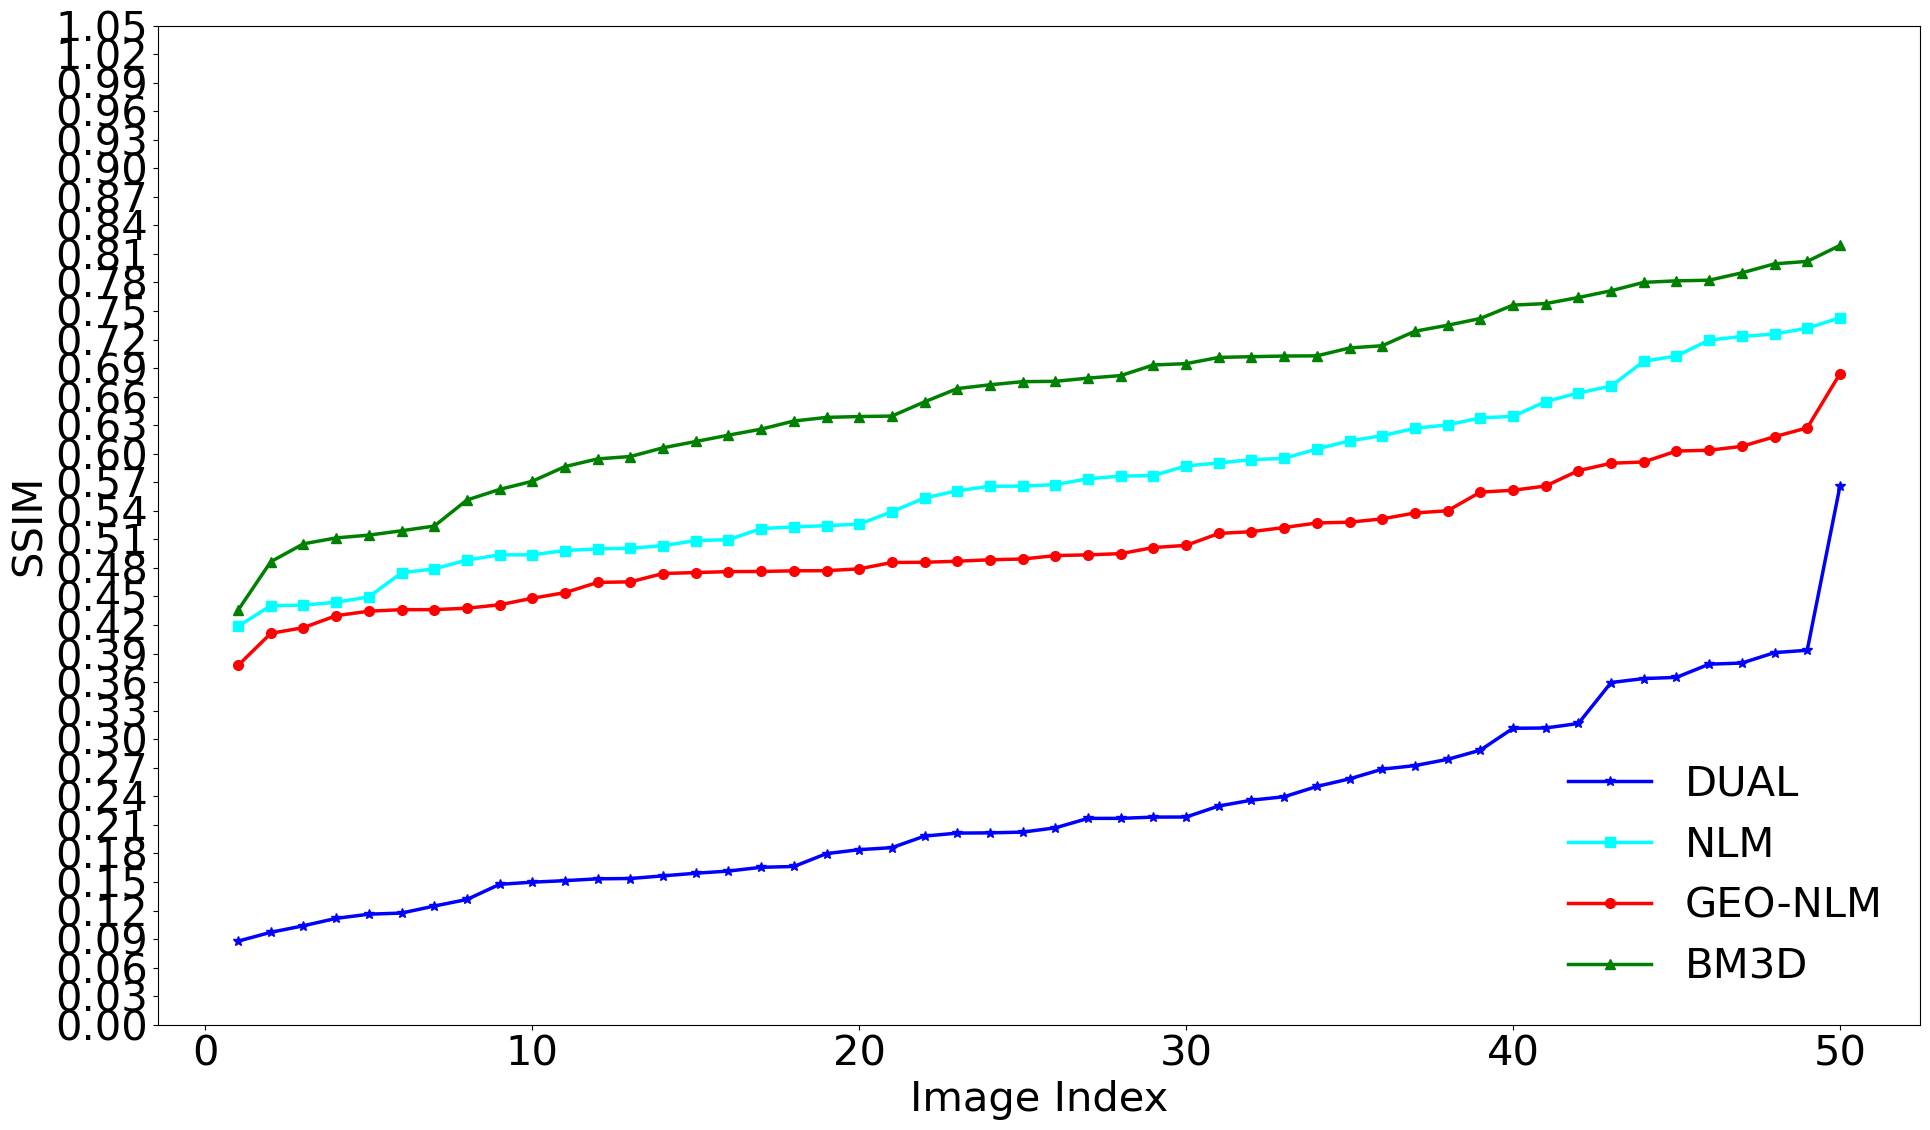

In [12]:
# Root directory for low noisy output data
root_dir_high = f'/workspace/data/output/set50/high_noisy_50'

dir_results =  f'{root_dir_high}/results'

# Directory for results (where graphs will be saved)
dir_output =  f'{root_dir_high}/results'

# Function to generate the graph with original data
def plot_original_graph(df):
    # x axis: image indices from 1 to the number of images
    x = np.arange(1, len(df) + 1)

    # Plotting curves for each method (SSIM for NLM, GEO-NLM, and BM3D)
    plt.figure(figsize=(20, 12))  # Figure size (wide enough for better readability)
    plt.plot(x, df['ssim_dual'], label='DUAL', color='blue', marker='*', linestyle='-')  # NLM in cyan
    plt.plot(x, df['ssim_nlm'], label='NLM', color='cyan', marker='s', linestyle='-')  # NLM in cyan
    plt.plot(x, df['ssim_gnlm'], label='GEO-NLM', color='red', marker='o', linestyle='-')  # GEO-NLM in red
    plt.plot(x, df['ssim_bm3d'], label='BM3D', color='green', marker='^', linestyle='-')  # BM3D in green

    # Labels for the axes
    plt.xlabel('Image Index')
    plt.ylabel('SSIM' )
    
    ax = plt.gca()
    set_dynamic_ssim_axis(ax, df, step=0.03, margin_ratio=0.50)  

    plt.grid(False)  # Disabling grid for a cleaner look
    
    # Positioning the legend in the upper right corner
    plt.legend(loc='upper right', frameon=False, ncol=1)

    # Adjust layout to ensure everything fits and save the figure as a high-resolution PDF
    plt.tight_layout()
    plt.savefig(f'{dir_output}/graph_ssim_high50_no_sorted.pdf', dpi=600, bbox_inches='tight', transparent=True)
    plt.show()

# Function to generate the graph with sorted data (ascending order)
def plot_sorted_graph(df):
    x = np.arange(1, len(df) + 1)

    # Sorting the SSIM values for each method
    sorted_dual = np.sort(df['ssim_dual'])
    sorted_nlm = np.sort(df['ssim_nlm'])
    sorted_geonlm = np.sort(df['ssim_gnlm'])
    sorted_bm3d = np.sort(df['ssim_bm3d'])

    # Plotting the curves for each method (SSIM sorted)
    plt.figure(figsize=(20, 12))  # Slightly narrower figure for the sorted version
    plt.plot(x, sorted_dual, label='DUAL', color='blue', marker='*', linestyle='-')  # DUAL in blue
    plt.plot(x, sorted_nlm, label='NLM', color='cyan', marker='s', linestyle='-')  # NLM in cyan
    plt.plot(x, sorted_geonlm, label='GEO-NLM', color='red', marker='o', linestyle='-')  # GEO-NLM in red
    plt.plot(x, sorted_bm3d, label='BM3D', color='green', marker='^', linestyle='-')  # BM3D in green

    # Labels for the axes
    plt.xlabel('Image Index')
    plt.ylabel('SSIM')

    ax = plt.gca()
    set_dynamic_ssim_axis(ax, df, step=0.03, margin_ratio=0.30)   

    plt.grid(False)  # Disabling grid for a cleaner look
    
    # Positioning the legend in the lower right corner
    plt.legend(loc='lower right', frameon=False, ncol=1)

    # Adjust layout to ensure everything fits and save the figure as a high-resolution PDF
    plt.tight_layout()   
    plt.savefig(f'{dir_output}/graph_ssim_high50_sorted.pdf', dpi=600, bbox_inches='tight', transparent=True)
    plt.show()

# Reading the data from an Excel file (replace the path with your actual file path)
file_path = 'ssim.xlsx'  # Path to the Excel file
df = pd.read_excel(f'{dir_results}/{file_path}')

# Generating both graphs (original and sorted)
plot_original_graph(df)
plot_sorted_graph(df)


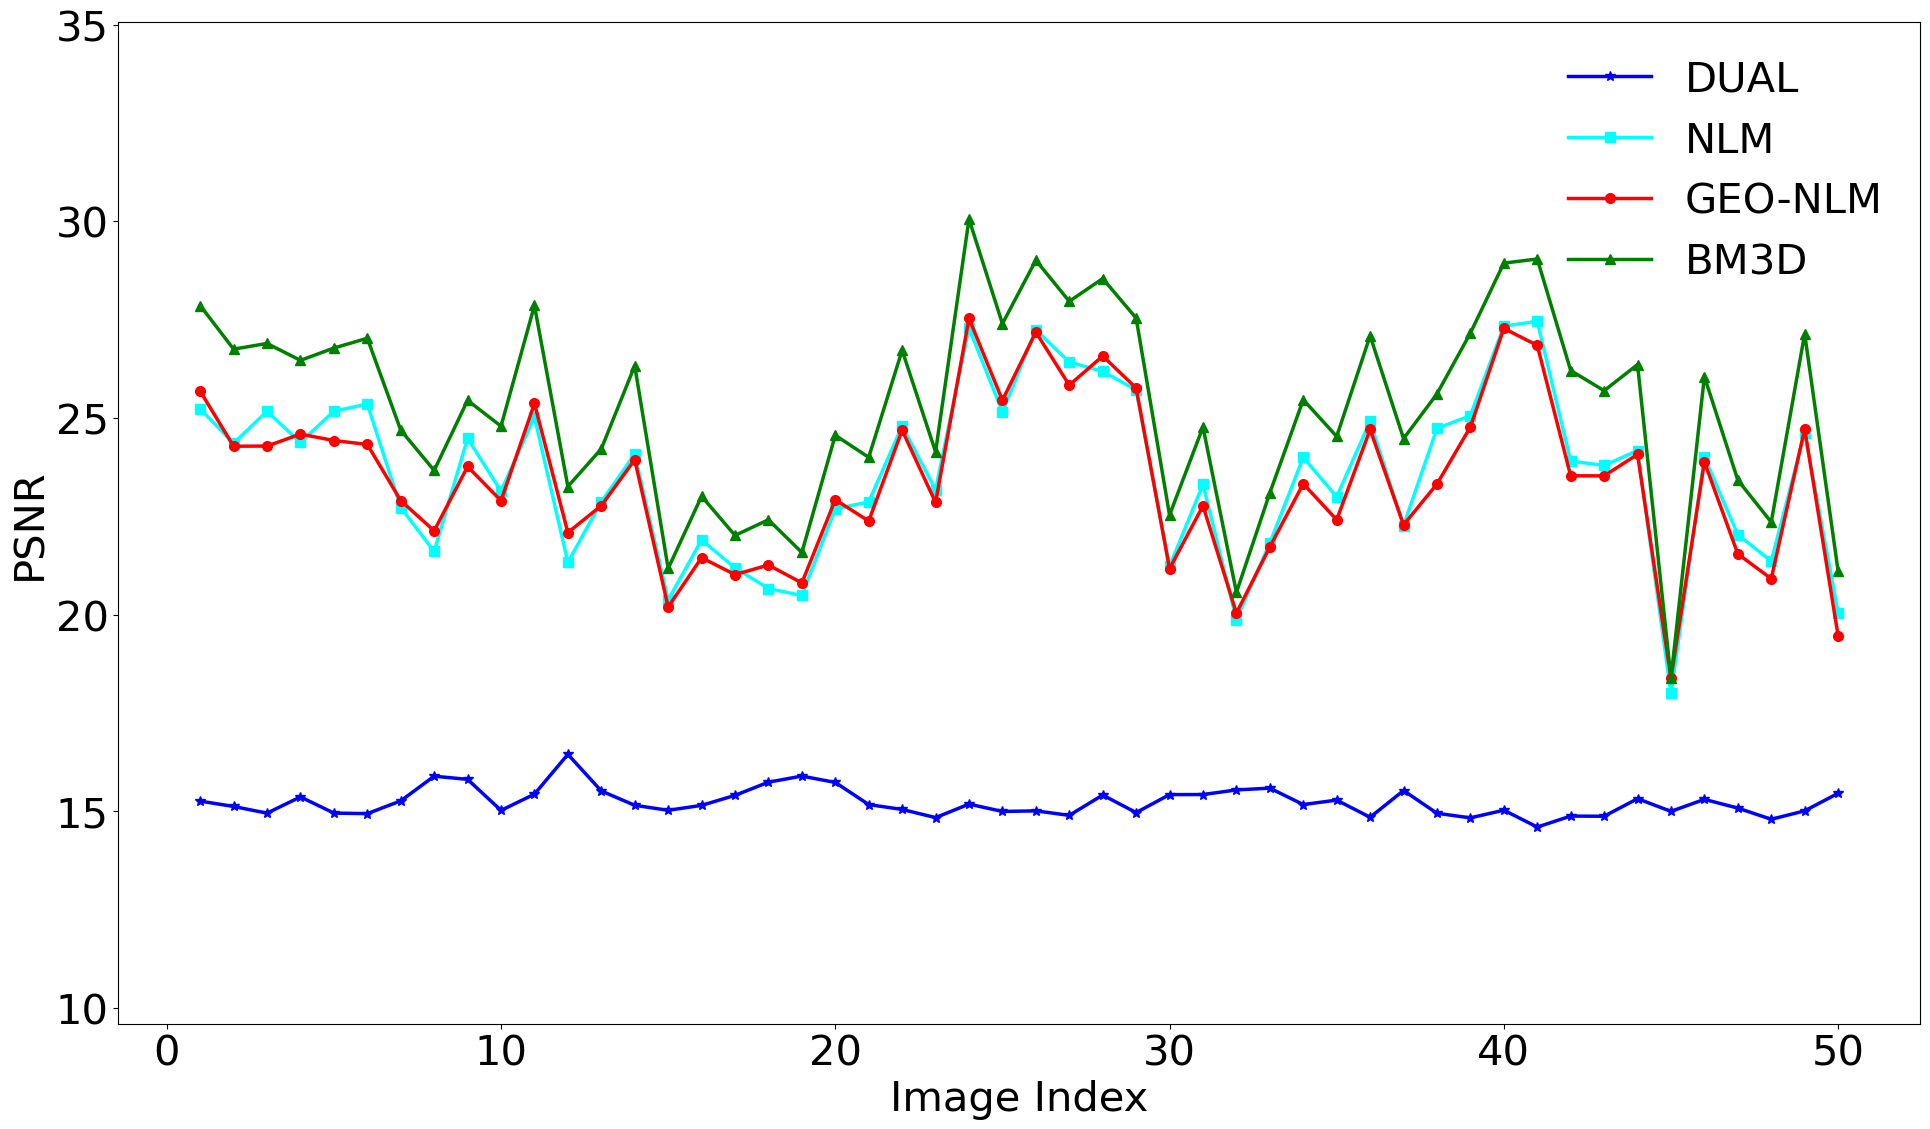

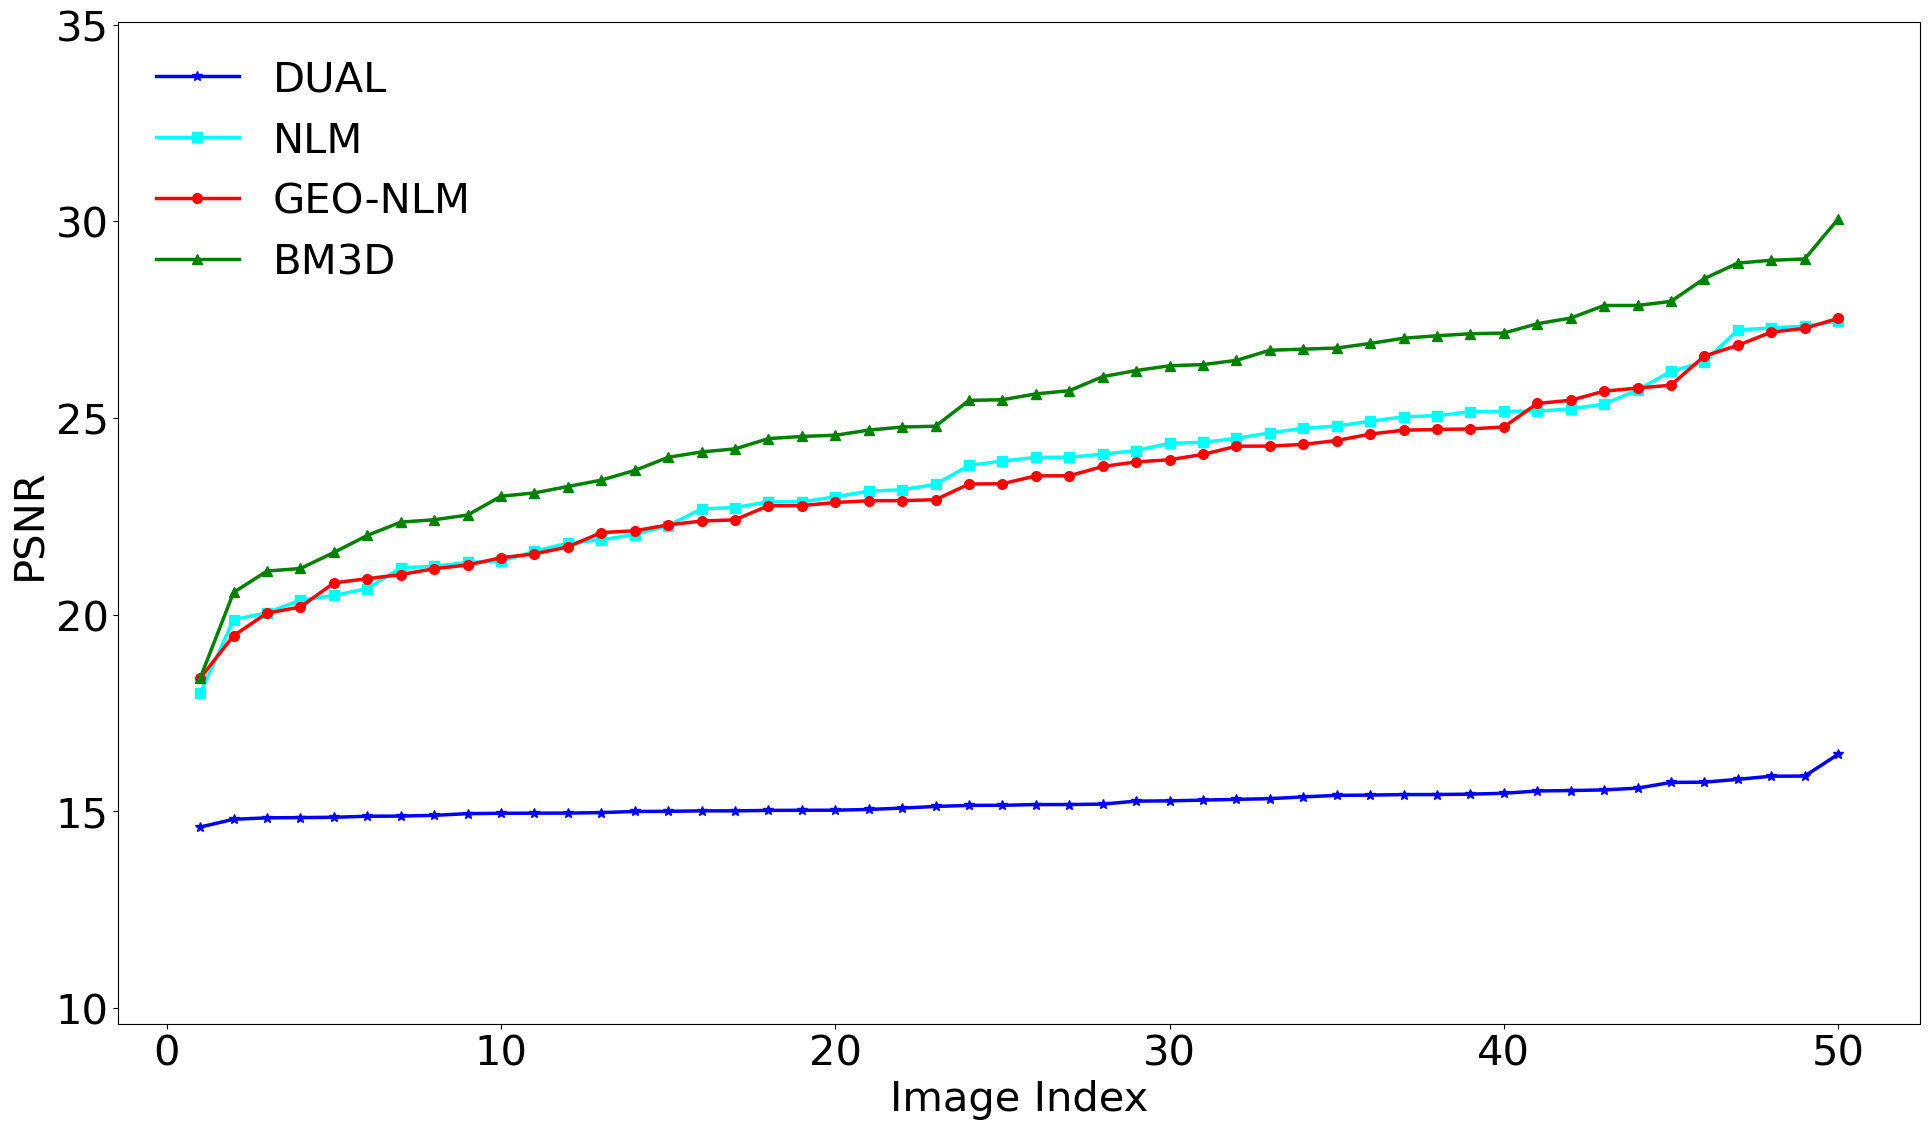

In [13]:

# Function to generate the graph with original data
def plot_original_graph(df):
    # x axis: image indices from 1 to the number of images
    x = np.arange(1, len(df) + 1)

    # Plotting curves for each method (PSNR for NLM, GEO-NLM, and BM3D)
    plt.figure(figsize=(20, 12))  # Figure size (wide enough for better readability)
    plt.plot(x, df['psnr_dual'], label='DUAL', color='blue', marker='*', linestyle='-')  # DUAL in blue
    plt.plot(x, df['psnr_nlm'], label='NLM', color='cyan', marker='s', linestyle='-')  # NLM in cyan
    plt.plot(x, df['psnr_gnlm'], label='GEO-NLM', color='red', marker='o', linestyle='-')  # GEO-NLM in red
    plt.plot(x, df['psnr_bm3d'], label='BM3D', color='green', marker='^', linestyle='-')  # BM3D in green

    # Labels for the axes
    plt.xlabel('Image Index')
    plt.ylabel('PSNR')

    # Find the minimum and maximum SSIM values ​​for all methods
    min_psnr = min(df['psnr_dual'].min(), df['psnr_nlm'].min(), df['psnr_gnlm'].min(), df['psnr_bm3d'].min())
    max_psnr = max(df['psnr_dual'].max(), df['psnr_nlm'].max(), df['psnr_gnlm'].max(), df['psnr_bm3d'].max())

    # Adjust the Y-axis limit to be slightly below the minimum and slightly above the maximum
    plt.ylim(min_psnr - 5, max_psnr + 5)  
    plt.grid(False)  # Disabling grid for a cleaner look
    
    # Positioning the legend in the upper right corner
    plt.legend(loc='upper right', frameon=False, ncol=1)

    # Adjust layout to ensure everything fits and save the figure as a high-resolution PDF
    plt.tight_layout()
    plt.savefig(f'{dir_output}/graph_psnr_high50_no_sorted.pdf', dpi=600, bbox_inches='tight', transparent=True)
    plt.show()

# Function to generate the graph with sorted data (ascending order)
def plot_sorted_graph(df):
    x = np.arange(1, len(df) + 1)

    # Sorting the psnr values for each method
    sorted_dual = np.sort(df['psnr_dual'])
    sorted_nlm = np.sort(df['psnr_nlm'])
    sorted_geonlm = np.sort(df['psnr_gnlm'])
    sorted_bm3d = np.sort(df['psnr_bm3d'])

    # Plotting the curves for each method (PSNR sorted)
    plt.figure(figsize=(20, 12))  # Slightly narrower figure for the sorted version
    plt.plot(x, sorted_dual, label='DUAL', color='blue', marker='*', linestyle='-')  # DUAL in blue
    plt.plot(x, sorted_nlm, label='NLM', color='cyan', marker='s', linestyle='-')  # NLM in cyan
    plt.plot(x, sorted_geonlm, label='GEO-NLM', color='red', marker='o', linestyle='-')  # GEO-NLM in red
    plt.plot(x, sorted_bm3d, label='BM3D', color='green', marker='^', linestyle='-')  # BM3D in green

    # Labels for the axes
    plt.xlabel('Image Index')
    plt.ylabel('PSNR')

    # Find the minimum and maximum SSIM values ​​for all methods
    min_psnr = min(df['psnr_dual'].min(), df['psnr_nlm'].min(), df['psnr_gnlm'].min(), df['psnr_bm3d'].min())
    max_psnr = max(df['psnr_dual'].max(), df['psnr_nlm'].max(), df['psnr_gnlm'].max(), df['psnr_bm3d'].max())

    # Adjust the Y-axis limit to be slightly below the minimum and slightly above the maximum
    plt.ylim(min_psnr - 5, max_psnr + 5)  
    
    plt.grid(False)  # Disabling grid for a cleaner look
    
    # Positioning the legend in the upper left corner
    plt.legend(loc='upper left', frameon=False, ncol=1)

    # Adjust layout to ensure everything fits and save the figure as a high-resolution PDF
    plt.tight_layout()   
    plt.savefig(f'{dir_output}/graph_psnr_high50_sorted.pdf', dpi=600, bbox_inches='tight', transparent=True)
    plt.show()

# Reading the data from an Excel file (replace the path with your actual file path)
file_path = 'psnr.xlsx'  # Path to the Excel file
df = pd.read_excel(f'{dir_results}/{file_path}')

# Generating both graphs (original and sorted)
plot_original_graph(df)
plot_sorted_graph(df)
